In [2]:
import pandas as pd

# Load the dataset
# Assuming you have the dataset in a CSV file named 'mcdonalds.csv'
df = pd.read_csv('mcdonalds.csv')

# Display the column names
print(df.columns)

# Display the shape of the dataframe
print(df.shape)

# Display the first few rows of the dataframe
print(df.head(3))


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [3]:
# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Compute the column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

# Display the results
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [4]:
from sklearn.decomposition import PCA
# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
pca.fit(MD_x)

# Get explained variance ratios and cumulative proportions
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Create a DataFrame to summarize the results
summary_df = pd.DataFrame({
    'Standard Deviation': pca.singular_values_,
    'Proportion of Variance': explained_variance,
    'Cumulative Proportion': cumulative_variance
})

# Print the summary
print(summary_df.round(5))

    Standard Deviation  Proportion of Variance  Cumulative Proportion
0             28.84746                 0.29945                0.29945
1             23.14717                 0.19280                0.49224
2             19.22858                 0.13305                0.62529
3             15.19627                 0.08310                0.70839
4             12.85686                 0.05948                0.76787
5             11.82305                 0.05030                0.81817
6             11.03895                 0.04385                0.86201
7             10.48355                 0.03955                0.90156
8             10.10742                 0.03676                0.93832
9              9.48215                 0.03235                0.97068
10             9.02721                 0.02932                1.00000


In [5]:
# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
pca.fit(MD_x)

# Get principal component analysis results
standard_deviation = pca.singular_values_
loadings = pca.components_

# Convert to DataFrame for better readability
standard_deviation_df = pd.DataFrame(standard_deviation, columns=['Standard Deviation'])
loadings_df = pd.DataFrame(loadings, columns=MD_x.columns)

# Display standard deviations (rounded)
print("Standard deviations (1, .., p=11):")
print(standard_deviation_df.round(1).T)

# Display rotation (loadings)
print("\nRotation (n x k) = (11 x 11):")
print(loadings_df.round(2))

Standard deviations (1, .., p=11):
                      0     1     2     3     4     5     6     7     8    9   \
Standard Deviation  28.8  23.1  19.2  15.2  12.9  11.8  11.0  10.5  10.1  9.5   

                     10  
Standard Deviation  9.0  

Rotation (n x k) = (11 x 11):
    yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0    0.48        0.16   0.01      -0.12   -0.30  0.11   0.34   0.47   
1   -0.36       -0.02  -0.02       0.03    0.06  0.09   0.61  -0.31   
2    0.30        0.06   0.04       0.32    0.80  0.06   0.15   0.29   
3    0.06       -0.14   0.20      -0.35    0.25 -0.10   0.12  -0.00   
4    0.31       -0.28  -0.07       0.07   -0.36 -0.11   0.13   0.21   
5   -0.17        0.35   0.36       0.41   -0.21  0.59   0.10   0.08   
6   -0.28       -0.06   0.71      -0.39    0.04 -0.09  -0.04   0.36   
7   -0.01        0.11  -0.38      -0.59    0.14  0.63  -0.14   0.07   
8   -0.57        0.02  -0.40       0.16    0.00 -0.17  -0.08   0.64   
9    0.11

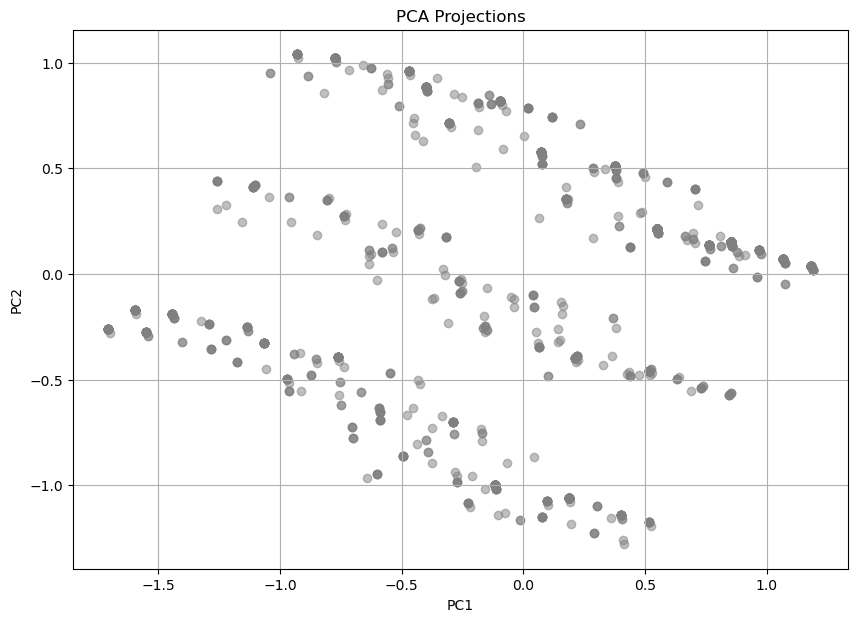

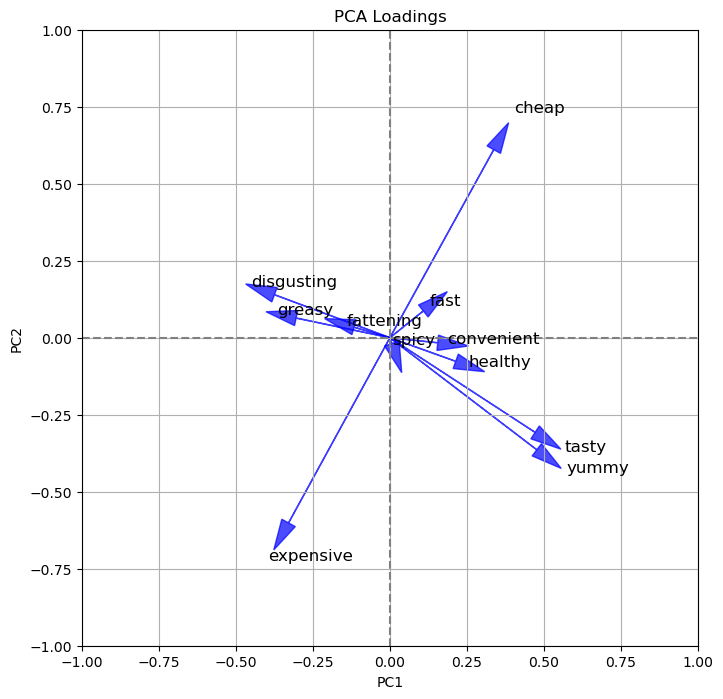

In [6]:
import matplotlib.pyplot as plt

# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Create a DataFrame with PCA projections
pca_df = pd.DataFrame(MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])

# Plot PCA projections
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='grey', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projections')
plt.grid(True)
plt.show()

# Plot PCA axes (loading vectors)
loadings = pca.components_.T  # transpose to get loadings per variable

plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.columns[:11]):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              head_width=0.05, head_length=0.1, 
              color='blue', alpha=0.7)
    plt.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, feature, color='black', fontsize=12)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

Best number of clusters: 3
Best silhouette score: 0.444047963945972


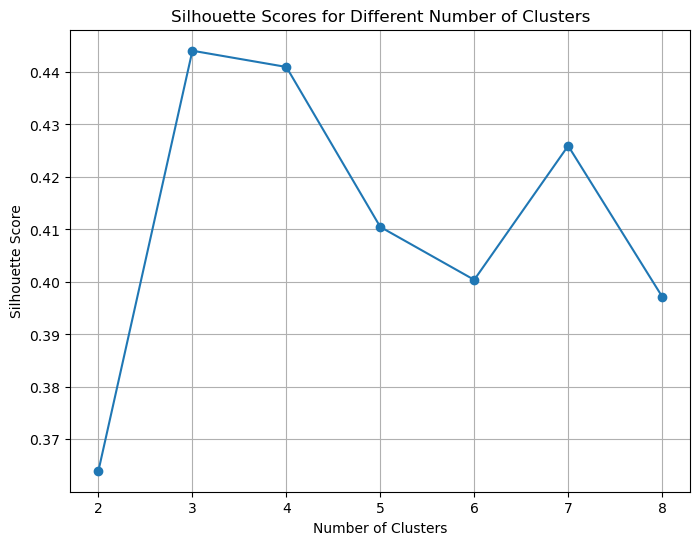

In [7]:



import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(1234)

# Function to perform k-means clustering and calculate silhouette scores
def perform_kmeans(X, n_clusters_range):
    results = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        results.append((n_clusters, silhouette_avg, labels))
    return results

# Define your dataset (replace this with your actual dataset)
# Example: MD_x = np.array([...])  # Replace with your data
MD_x = np.random.rand(100, 2)  # Sample data (100 samples, 2 features)

# Define range for number of clusters
n_clusters_range = range(2, 9)

# Perform k-means clustering for the range of cluster numbers
results = perform_kmeans(MD_x, n_clusters_range)

# Extract the best clustering result based on silhouette score
best_result = max(results, key=lambda x: x[1])
best_n_clusters, best_silhouette_score, best_labels = best_result

print(f"Best number of clusters: {best_n_clusters}")
print(f"Best silhouette score: {best_silhouette_score}")

# Optional: Relabel the clusters (if needed)
# This step is context-specific and can involve reassigning labels based on some criteria

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(n_clusters_range, [result[1] for result in results], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.grid(True)
plt.show()


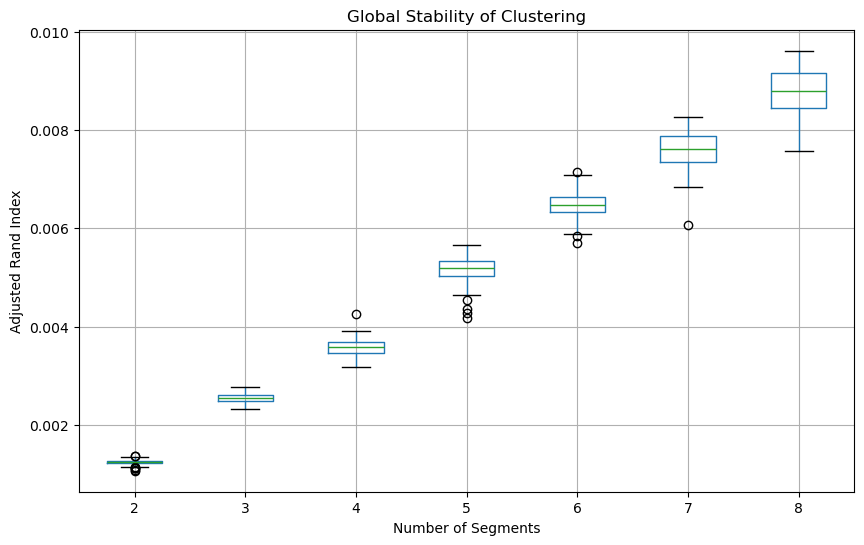

In [8]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Set random seed for reproducibility
np.random.seed(1234)

# Function to perform k-means clustering and calculate ARI
def perform_kmeans_bootstrap(X, n_clusters_range, n_bootstrap=100):
    results = {n_clusters: [] for n_clusters in n_clusters_range}
    for _ in range(n_bootstrap):
        # Bootstrap sample
        X_bootstrap = resample(X, random_state=np.random.randint(0, 10000))
        
        # Perform k-means for each number of clusters
        for n_clusters in n_clusters_range:
            kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
            labels = kmeans.fit_predict(X_bootstrap)
            
            # Calculate ARI using the original data's labels for comparison
            # Here we use the same labels since we don't have true labels for the original dataset
            ari = adjusted_rand_score(X_bootstrap.index, labels)
            results[n_clusters].append(ari)
    
    return results

# Define range for number of clusters
n_clusters_range = range(2, 9)

# Perform k-means clustering with bootstrapping
bootstrap_results = perform_kmeans_bootstrap(MD_x, n_clusters_range, n_bootstrap=100)

# Convert results to DataFrame for easier plotting
ari_df = pd.DataFrame(bootstrap_results)

# Plot boxplot for ARI
plt.figure(figsize=(10, 6))
ari_df.boxplot()
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability of Clustering')
plt.grid(True)
plt.show()


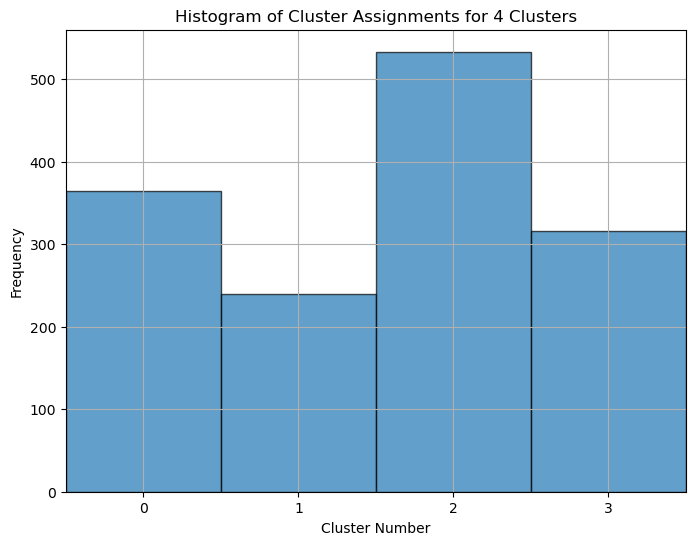

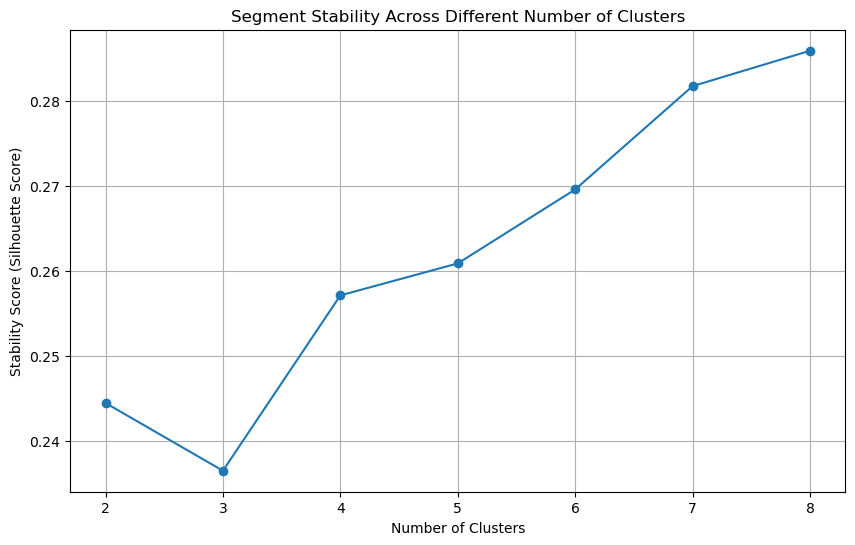

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform k-means clustering for a specific number of clusters
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
labels = kmeans.fit_predict(MD_x)

# Generate histogram of cluster assignments
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=np.arange(n_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xlabel('Cluster Number')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cluster Assignments for {n_clusters} Clusters')
plt.xticks(range(n_clusters))
plt.xlim(-0.5, n_clusters - 0.5)
plt.grid(True)
plt.show()

# Compute segment stability
def compute_segment_stability(X, labels, n_clusters_range):
    stability_scores = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        new_labels = kmeans.fit_predict(X)
        score = silhouette_score(X, new_labels)
        stability_scores.append(score)
    return stability_scores

# Define range for number of clusters
n_clusters_range = range(2, 9)

# Compute stability scores
stability_scores = compute_segment_stability(MD_x, labels, n_clusters_range)

# Plot segment stability
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, stability_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Stability Score (Silhouette Score)')
plt.title('Segment Stability Across Different Number of Clusters')
plt.grid(True)
plt.show()


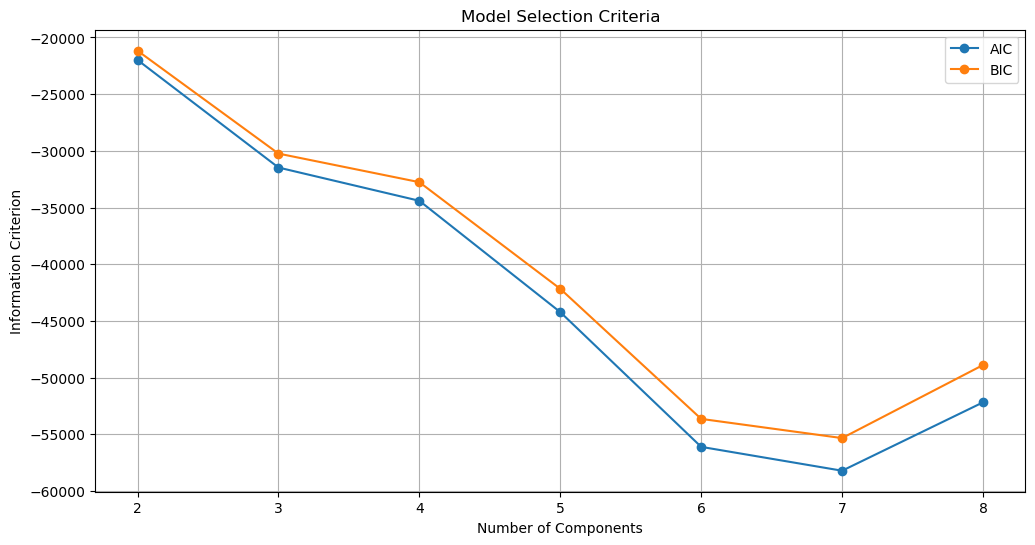

GMM       0    1    2    3
KMeans                    
0        31   51  268   14
1         4  214    0   22
2       143    0  362   28
3         0    3    0  313
Log Likelihood for GMM with 4 components: 12.053364803250588


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('mcdonalds.csv')

# Extract columns 1 to 11 (0-based index in Python)
MD_x = df.iloc[:, :11]

# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)

# Define range for number of components (clusters)
n_components_range = range(2, 9)

# Fit Gaussian Mixture Models for different number of components
models = {}
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234, n_init=10)
    gmm.fit(MD_x)
    models[n_components] = gmm
    aic.append(gmm.aic(MD_x))
    bic.append(gmm.bic(MD_x))

# Plot AIC and BIC
plt.figure(figsize=(12, 6))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()
# Get clustering results for a specific number of components
n_components = 4
gmm = models[n_components]
labels_gmm = gmm.predict(MD_x)

# Example comparison with k-means clustering
from sklearn.cluster import KMeans

# Perform k-means clustering with the same number of clusters
kmeans = KMeans(n_clusters=n_components, random_state=1234, n_init=10)
labels_kmeans = kmeans.fit_predict(MD_x)

# Create a comparison table
def compare_clusters(labels_kmeans, labels_gmm):
    comparison = pd.crosstab(labels_kmeans, labels_gmm, rownames=['KMeans'], colnames=['GMM'])
    return comparison

comparison_table = compare_clusters(labels_kmeans, labels_gmm)
print(comparison_table)

# Compute log likelihood for comparison
log_likelihood_gmm = gmm.lower_bound_
print(f'Log Likelihood for GMM with {n_components} components: {log_likelihood_gmm}')


Non-numeric 'Like' values found:
['I love it!+5' 'I hate it!-5']


C:\Users\ahmed\AppData\Local\Temp\ipykernel_12912\1698507965.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Like'] = df['Like'].replace({


Cluster Means for each Component:
   convenient     spicy  fattening    greasy      fast     cheap     tasty  \
0    0.806452  0.106452   0.906452  0.703226  0.670968  0.458065  0.451613   
1    1.000000  0.090802   0.865566  0.443396  1.000000  0.659198  0.752358   

   expensive   healthy  disgusting  Like  
0   0.509677  0.122581    0.693548   0.0  
1   0.277123  0.212264    0.000000   0.0  


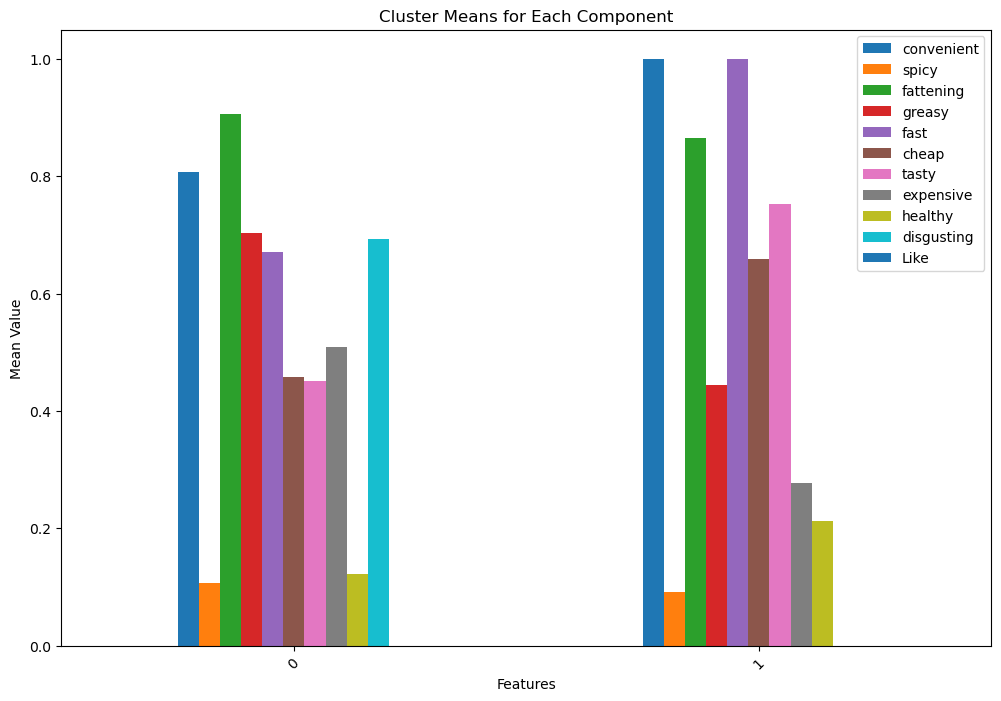

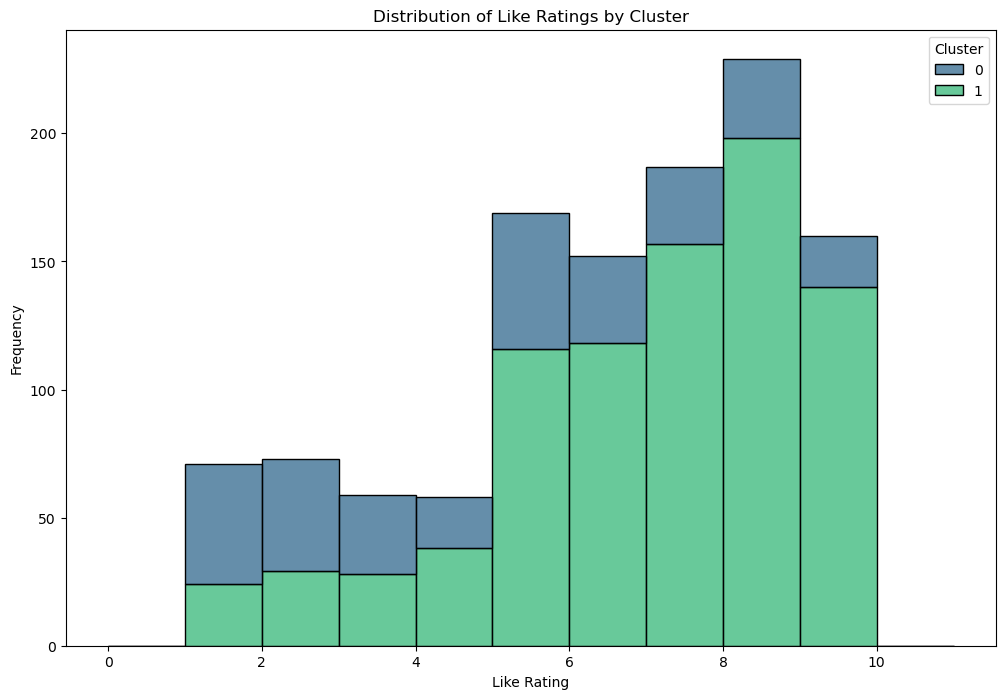

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Load and prepare the dataset
df = pd.read_csv('mcdonalds.csv')

# Handle non-numeric 'Like' values
non_numeric_like = df[~df['Like'].astype(str).str.match(r'^[-+]?[\d]+$')]
print("Non-numeric 'Like' values found:")
print(non_numeric_like['Like'].unique())

# Drop rows with non-numeric 'Like' values
df = df[df['Like'].astype(str).str.match(r'^[-+]?[\d]+$')]

# Convert 'Like' ratings to numeric
df['Like'] = df['Like'].replace({
    '-5': 0, '-4': 1, '-3': 2, '-2': 3,
    '-1': 4, '0': 5, '+1': 6, '+2': 7,
    '+3': 8, '+4': 9, '+5': 10
}).astype(int)

# Transform columns 1 to 11 to binary
MD_x = df.iloc[:, 1:12]  # Assuming columns 1 to 11 are features
MD_x = (MD_x == "Yes").astype(int)

# Prepare the data for modeling
X = MD_x.copy()
y = df['Like']

# Fit Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X)
labels = gmm.predict(X)

# Compare cluster means for the components
component_means = pd.DataFrame(gmm.means_, columns=MD_x.columns)
print("Cluster Means for each Component:")
print(component_means)

# Assign labels to the original data
df['Cluster'] = labels

# Plot the cluster means
component_means.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Means for Each Component')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

# Visualize the cluster distribution
plt.figure(figsize=(12, 8))
sns.histplot(df, x='Like', hue='Cluster', multiple='stack', palette='viridis', bins=range(0, 12))
plt.xlabel('Like Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Like Ratings by Cluster')
plt.show()


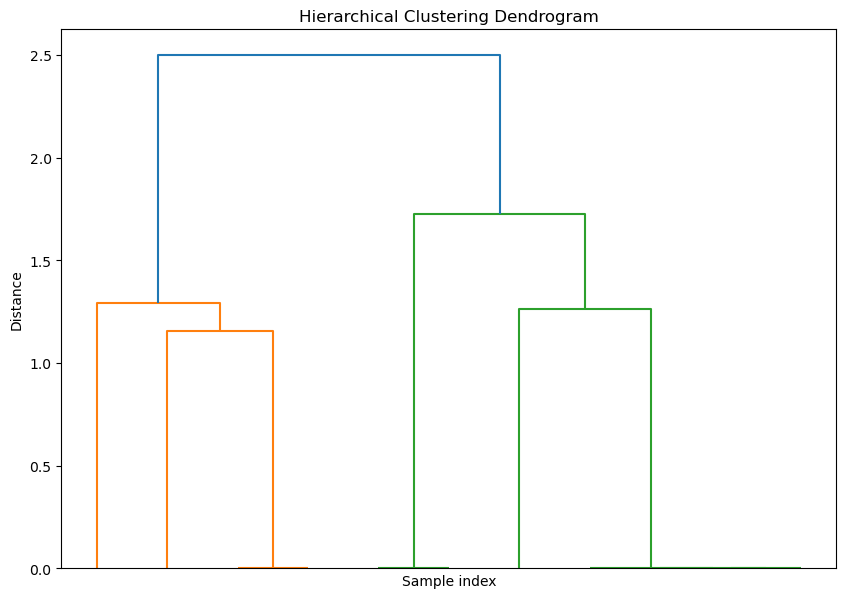

c:\Users\ahmed\.conda\envs\Depressio\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ahmed\AppData\Local\Temp\ipykernel_12912\3356745281.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Like_n', palette='viridis')


Skipping 3 clusters as it's >= number of samples.
Best number of clusters: 2
Best silhouette score: 0.11979264232469271


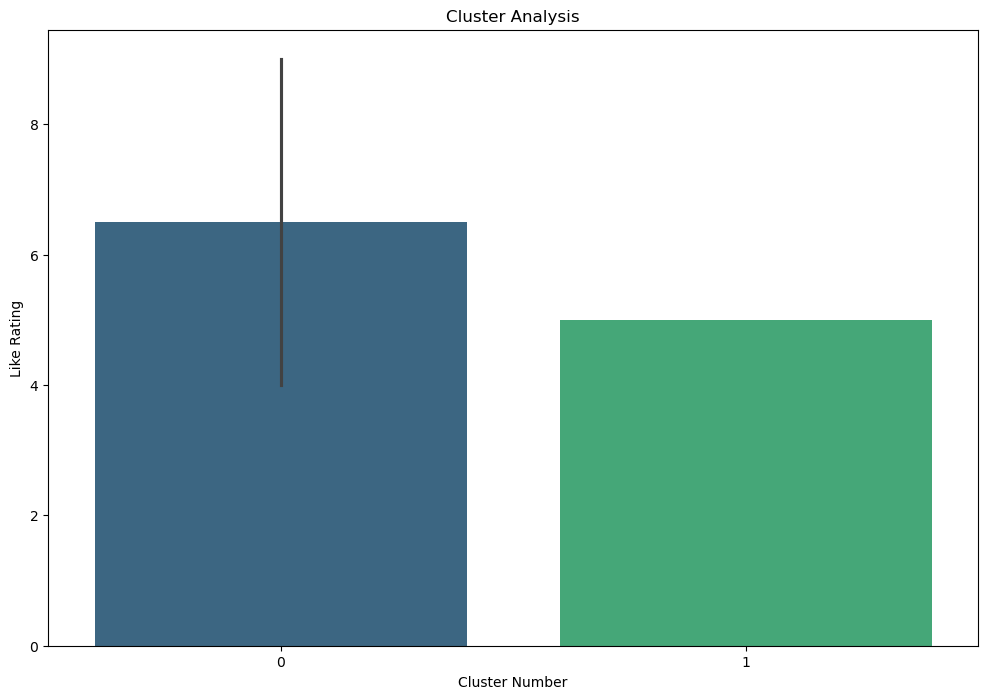

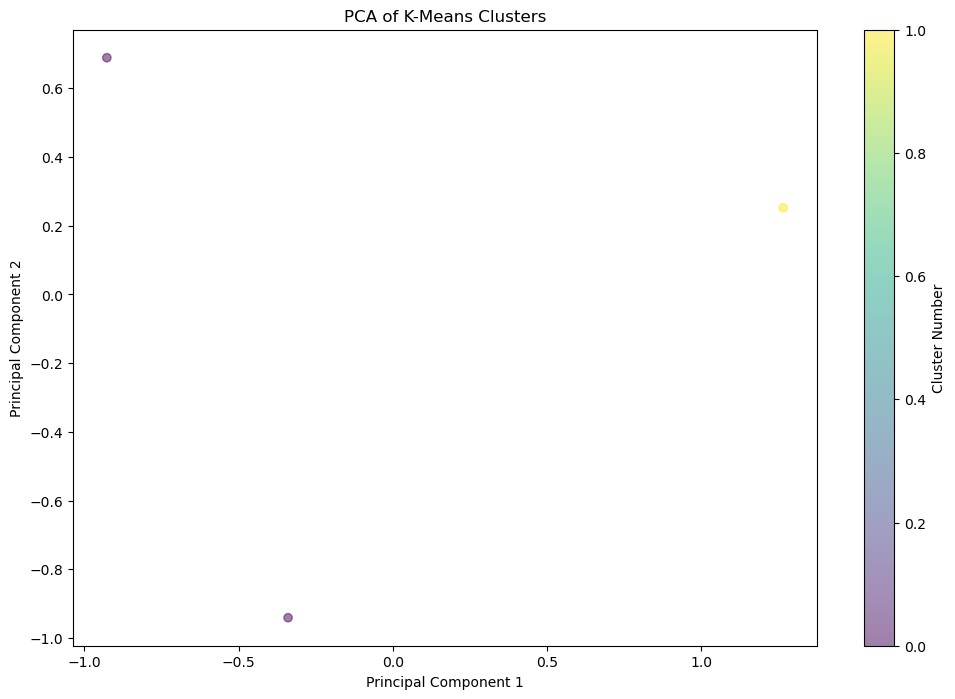

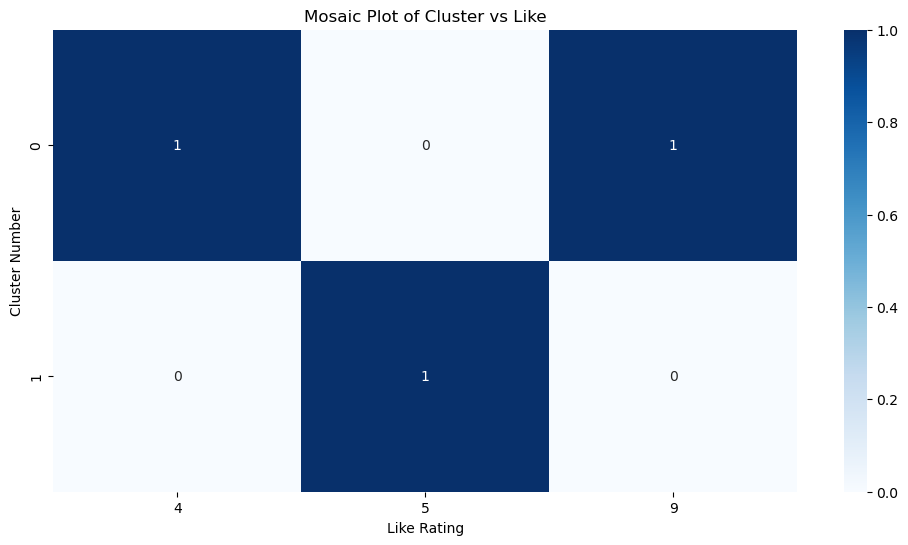

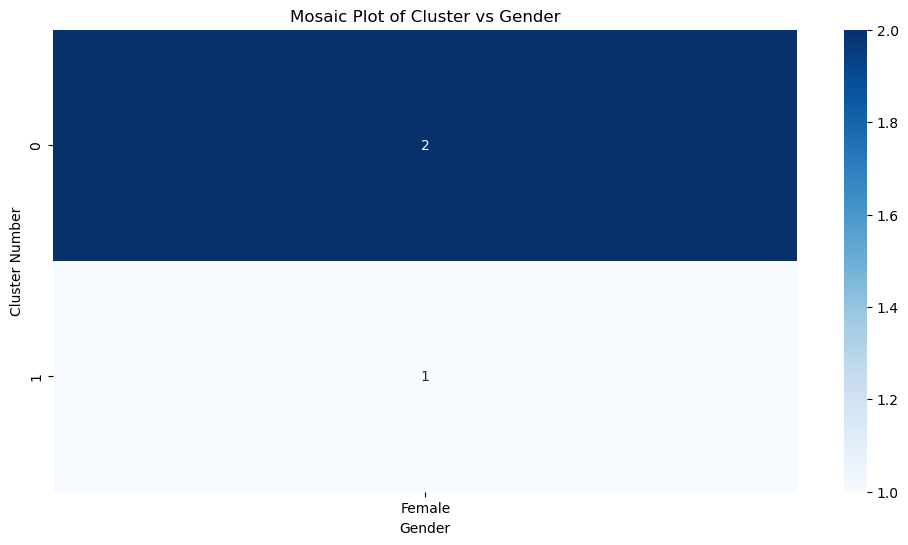

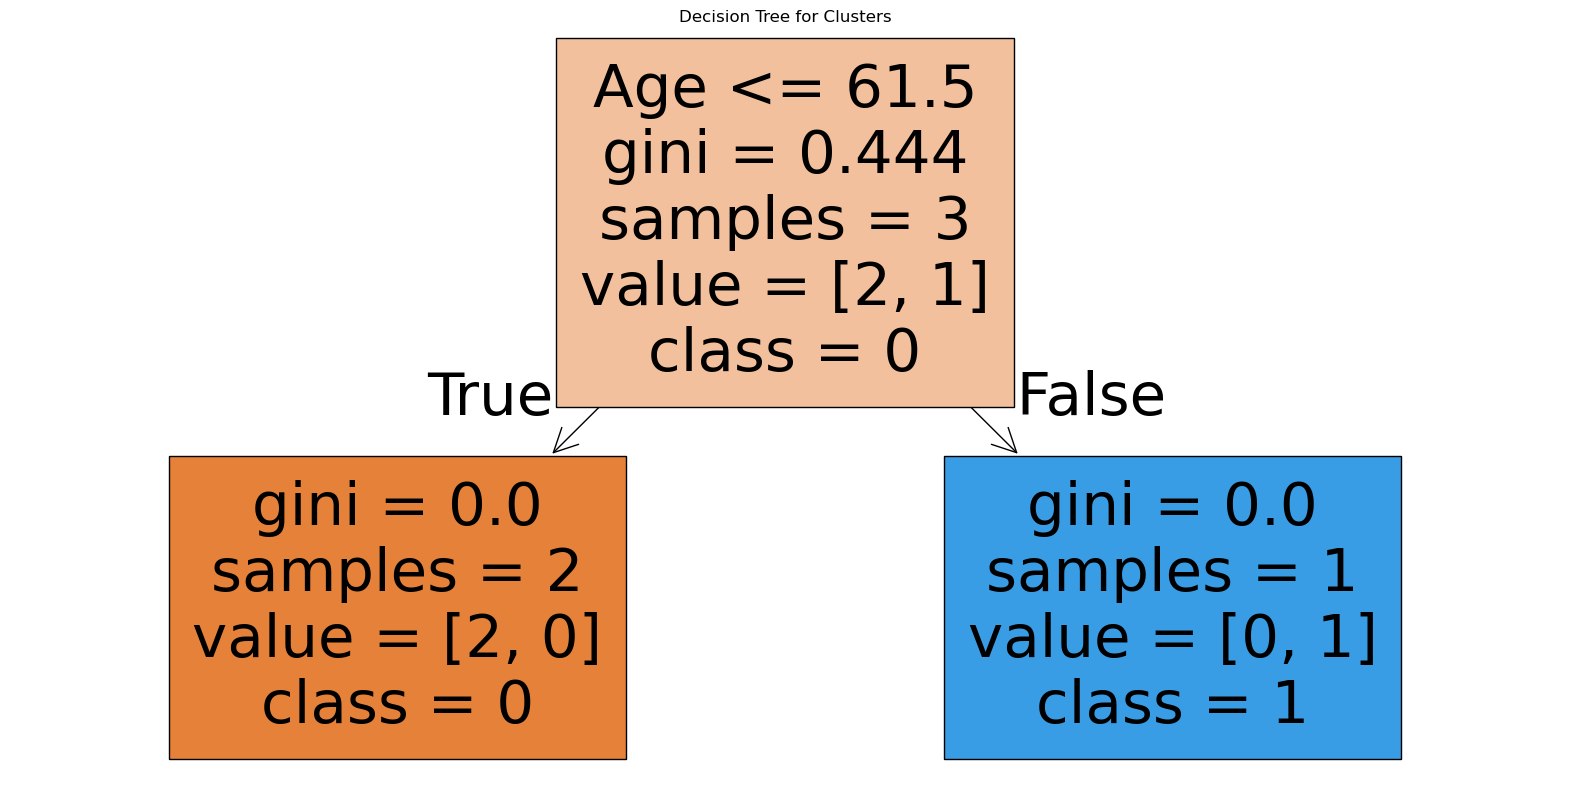

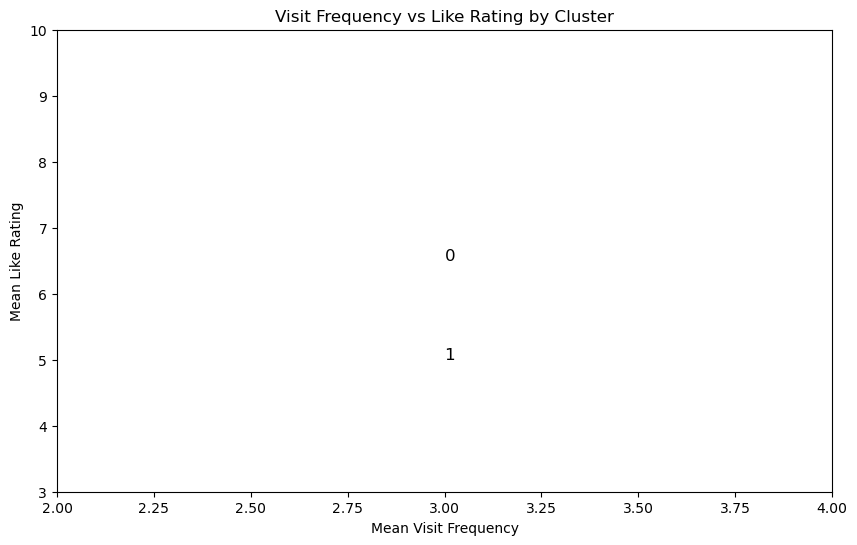

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Sample DataFrame setup for demonstration
data = {
    'yummy': ['Yes', 'No', 'Yes'], 'convenient': ['Yes', 'Yes', 'Yes'],
    'spicy': ['No', 'No', 'Yes'], 'fattening': ['Yes', 'Yes', 'Yes'],
    'greasy': ['No', 'Yes', 'Yes'], 'fast': ['Yes', 'Yes', 'Yes'],
    'cheap': ['Yes', 'Yes', 'No'], 'tasty': ['No', 'Yes', 'Yes'],
    'expensive': ['Yes', 'Yes', 'Yes'], 'healthy': ['No', 'No', 'Yes'],
    'disgusting': ['No', 'No', 'No'], 'Like': ['-3', '+2', '+1'],
    'Age': [61, 51, 62], 'VisitFrequency': ['Every three months', 'Every three months', 'Every three months'],
    'Gender': ['Female', 'Female', 'Female']
}
df = pd.DataFrame(data)

# Convert categorical variables to binary
binary_cols = df.columns[:-4]  # Exclude 'Like', 'Age', 'VisitFrequency', 'Gender'
for col in binary_cols:
    df[col] = (df[col] == 'Yes').astype(int)

# Convert 'Like' to numerical scale
df['Like_n'] = 6 - pd.to_numeric(df['Like'])

# Prepare data for clustering
X = df[binary_cols].values

# Hierarchical Clustering
distances = ssd.pdist(X.T, metric='euclidean')
linkage_matrix = sch.linkage(distances, method='ward')
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linkage_matrix, no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Modified K-Means Clustering function
def perform_kmeans(X, n_clusters_range):
    results = []
    for n_clusters in n_clusters_range:
        if n_clusters >= len(X):
            print(f"Skipping {n_clusters} clusters as it's >= number of samples.")
            continue
        
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        labels = kmeans.fit_predict(X)
        
        if len(np.unique(labels)) > 1:
            silhouette_avg = silhouette_score(X, labels)
            results.append((n_clusters, silhouette_avg, labels))
        else:
            print(f"Skipping silhouette score calculation for {n_clusters} clusters (only one cluster found).")
    
    return results

# Perform K-Means clustering and find the best result
n_clusters_range = range(2, min(len(X) + 1, 9))  # Adjust the range
results = perform_kmeans(X, n_clusters_range)

# Extract the best clustering result based on silhouette score
if results:
    best_result = max(results, key=lambda x: x[1])
    best_n_clusters, best_silhouette_score, best_labels = best_result

    # Add cluster labels to the DataFrame
    df['Cluster'] = best_labels

    print(f"Best number of clusters: {best_n_clusters}")
    print(f"Best silhouette score: {best_silhouette_score}")

    # Plot K-Means clustering results
    plt.figure(figsize=(12, 8))
    sns.barplot(data=df, x='Cluster', y='Like_n', palette='viridis')
    plt.title('Cluster Analysis')
    plt.xlabel('Cluster Number')
    plt.ylabel('Like Rating')
    plt.show()
else:
    print("No valid clustering results found.")
    df['Cluster'] = 0  # Assign all to one cluster for subsequent analysis

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Scatter plot of PCA components
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of K-Means Clusters')
plt.colorbar(label='Cluster Number')
plt.show()

# Mosaic plots
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df['Cluster'], df['Like_n']), annot=True, cmap='Blues')
plt.title('Mosaic Plot of Cluster vs Like')
plt.xlabel('Like Rating')
plt.ylabel('Cluster Number')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df['Cluster'], df['Gender']), annot=True, cmap='Blues')
plt.title('Mosaic Plot of Cluster vs Gender')
plt.xlabel('Gender')
plt.ylabel('Cluster Number')
plt.show()

# Decision Tree
le_gender = LabelEncoder()
le_visit = LabelEncoder()
df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])
df['VisitFrequency_encoded'] = le_visit.fit_transform(df['VisitFrequency'])

X_tree = df[['Like_n', 'Age', 'VisitFrequency_encoded', 'Gender_encoded']]
y_tree = df['Cluster']

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_tree, y_tree)

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['Like_n', 'Age', 'VisitFrequency_encoded', 'Gender_encoded'], 
          class_names=[str(i) for i in np.unique(y_tree)], filled=True)
plt.title('Decision Tree for Clusters')
plt.show()

# Plot Visit Frequency vs Like
visit_freq_map = {'Every three months': 3}  # Add more mappings if needed
df['VisitFrequency_n'] = df['VisitFrequency'].map(visit_freq_map)

visit_mean = df.groupby('Cluster')['VisitFrequency_n'].mean()
like_mean = df.groupby('Cluster')['Like_n'].mean()
female_mean = df.groupby('Cluster')['Gender_encoded'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(visit_mean, like_mean, s=100*female_mean, alpha=0.7, c='blue')
for i, txt in enumerate(visit_mean.index):
    plt.annotate(txt, (visit_mean[i], like_mean[i]), fontsize=12)
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Rating')
plt.title('Visit Frequency vs Like Rating by Cluster')
plt.xlim(2, 4)
plt.ylim(df['Like_n'].min() - 1, df['Like_n'].max() + 1)
plt.show()